In [21]:
import torch
import torchvision
from torchvision import transforms, datasets

In [22]:
train = datasets.MNIST("", train=True, download=True,transform=transforms.Compose([transforms.ToTensor()]))
    
test = datasets.MNIST("", train=True, download=True,transform=transforms.Compose([transforms.ToTensor()]))

In [23]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

In [24]:
import torch.nn as nn
import torch.nn.functional as F

In [25]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [26]:
X = torch.randn((28,28))
X = X.view(-1,28*28)

In [27]:
output = net(X)

In [28]:
output

tensor([[-2.3309, -2.1036, -2.3655, -2.3458, -2.3630, -2.6259, -2.4059, -2.1576,
         -2.2468, -2.1798]], grad_fn=<LogSoftmaxBackward>)

In [29]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        #data is a batch of featuresets and labels
        X, y = data
        net.zero_grad()
        output = net(X.view(-1,28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)
    
print("done...")

tensor(0.0132, grad_fn=<NllLossBackward>)
tensor(0.0711, grad_fn=<NllLossBackward>)
tensor(0.0111, grad_fn=<NllLossBackward>)
done...


In [30]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("accuracy: ", round(correct/total, 3))

accuracy:  0.974


In [31]:
X

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

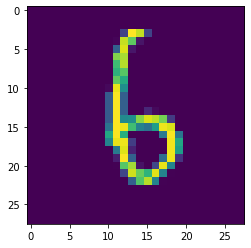

In [41]:
import matplotlib.pyplot as plt
plt.imshow(X[0].view(28,28))
plt.show()

In [42]:
print(torch.argmax(net(X[0].view(-1,784))[0]))

tensor(6)


tensor(6)


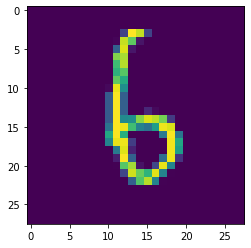

tensor(3)


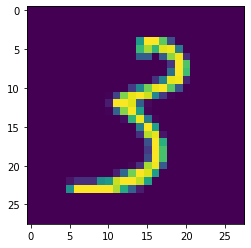

tensor(4)


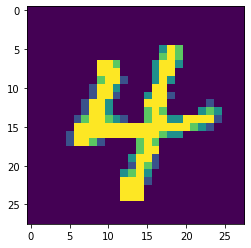

tensor(1)


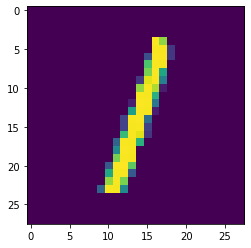

tensor(2)


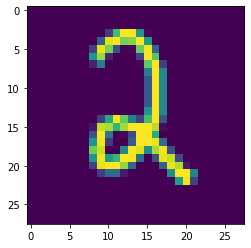

tensor(7)


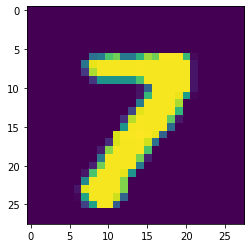

tensor(6)


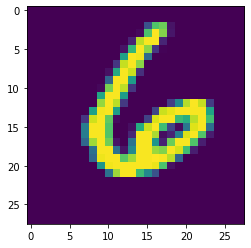

tensor(9)


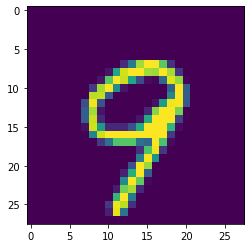

tensor(9)


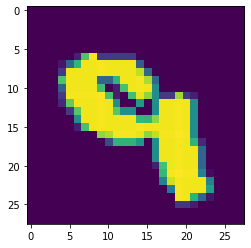

tensor(7)


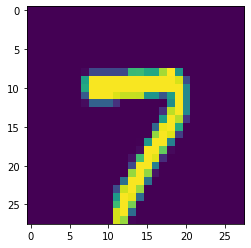

In [44]:
import matplotlib.pyplot as plt
for i in range(len(X)):
    plt.imshow(X[i].view(28,28))
    print(torch.argmax(net(X[i].view(-1,784))[0]))
    plt.show()